Contents of this notebook were partially prepared by Dr. Edward Raff (2019)

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
#new tricks
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


## First example is classification on Iris Dataset

In [2]:
data = datasets.load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
train_df, test_df= train_test_split(iris_df)  #default for shuffle is True
print(len(train_df),len(test_df))
#help(train_test_split)
display(train_df)

112 38


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
48,5.3,3.7,1.5,0.2,0.0
16,5.4,3.9,1.3,0.4,0.0
146,6.3,2.5,5.0,1.9,2.0
54,6.5,2.8,4.6,1.5,1.0
138,6.0,3.0,4.8,1.8,2.0
...,...,...,...,...,...
108,6.7,2.5,5.8,1.8,2.0
94,5.6,2.7,4.2,1.3,1.0
14,5.8,4.0,1.2,0.2,0.0
43,5.0,3.5,1.6,0.6,0.0


In [7]:
tree = DecisionTreeClassifier(max_depth=100)
#DecisionTreeClassifier(criterion='entropy')   #default criterion is 'gini'
#help(DecisionTreeClassifier)
tree.fit(train_df.drop('target', axis=1), train_df['target'])

DecisionTreeClassifier(max_depth=100)

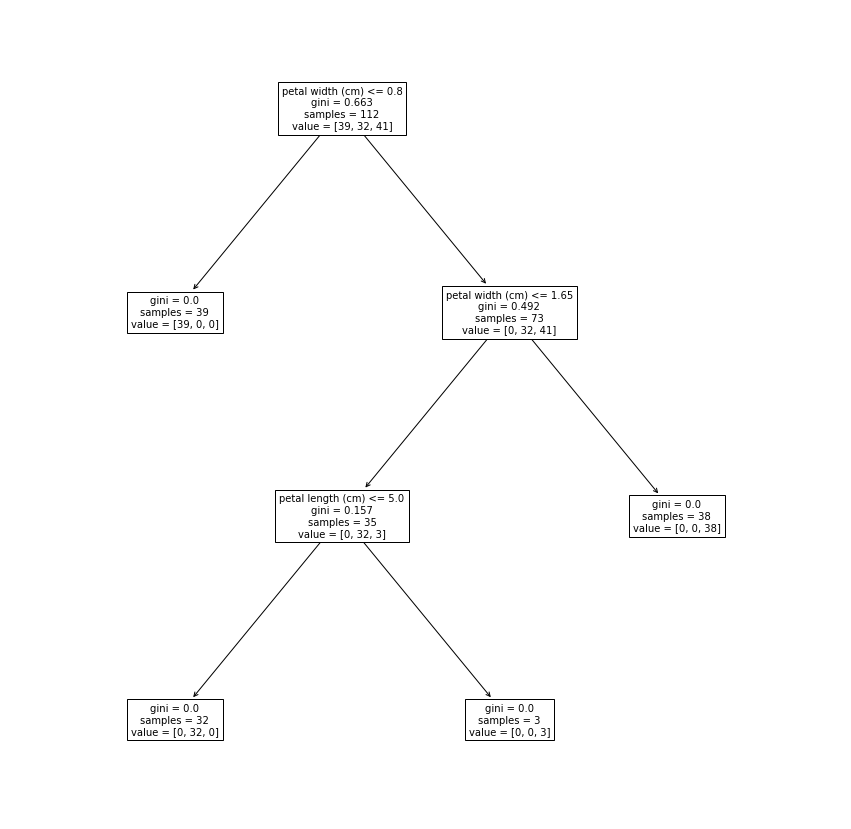

In [8]:
from sklearn import tree as tr
pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

Accuracy on training set?

In [9]:
sum(tree.predict(train_df.drop('target',axis=1))==train_df['target'])

112

We are not surprised by 100% accuracy on the training set, because we did not limit the tree depth or min no of samples in a split.

What about the accuracy on test set?

In [10]:
sum(tree.predict(test_df.drop('target',axis=1))==test_df['target'])

34

In [11]:
confusion_matrix(tree.predict(test_df.drop('target',axis=1)),test_df['target'])

array([[11,  0,  0],
       [ 0, 15,  1],
       [ 0,  3,  8]], dtype=int64)

In [12]:
tree.feature_importances_
#The feature importances (in the given order). 
#The higher, the more important the feature.
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

array([0.        , 0.        , 0.07386391, 0.92613609])

In [13]:
mat=tree.decision_path(test_df.iloc[14].drop('target').values.reshape(1,-1))
print(test_df.iloc[14].drop('target'))
print(mat)

sepal length (cm)    6.0
sepal width (cm)     2.2
petal length (cm)    5.0
petal width (cm)     1.5
Name: 119, dtype: float64
  (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1


In [14]:
tree.predict(test_df.drop('target',axis=1))==test_df['target']

80      True
66      True
88      True
42      True
8       True
84      True
77     False
83     False
46      True
5       True
93      True
75      True
117     True
29      True
119    False
96      True
1       True
67      True
111     True
71      True
72      True
126     True
85      True
10      True
59      True
149     True
130     True
36      True
101     True
26      True
135     True
64      True
73      True
100     True
22      True
70     False
74      True
28      True
Name: target, dtype: bool

## Regression on Boston House Dataset

In [15]:
data = datasets.load_boston()
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
housing_train_df, housing_test_df = train_test_split(housing_df)

In [16]:
housing_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21,19.3
109,0.26363,0.0,8.56,0.0,0.520,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55,19.4
288,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60,22.3
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81,21.4
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22,14.3


In [17]:
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)
tree_reg.fit(housing_train_df.drop('target',axis=1),housing_train_df['target'])

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)

In [18]:
mean_squared_error(tree_reg.predict(housing_train_df.drop('target',axis=1)), housing_train_df['target'])

10.253615533641808

In [19]:
mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])

25.97955669035755

In [20]:
tree_reg.score(housing_train_df.drop('target',axis=1), housing_train_df['target'])

0.8816665092543724

In [21]:
tree_reg.score(housing_test_df.drop('target',axis=1), housing_test_df['target'])

0.6645685323895102

Remember, score increases with a better model, whereas MSE decreases.

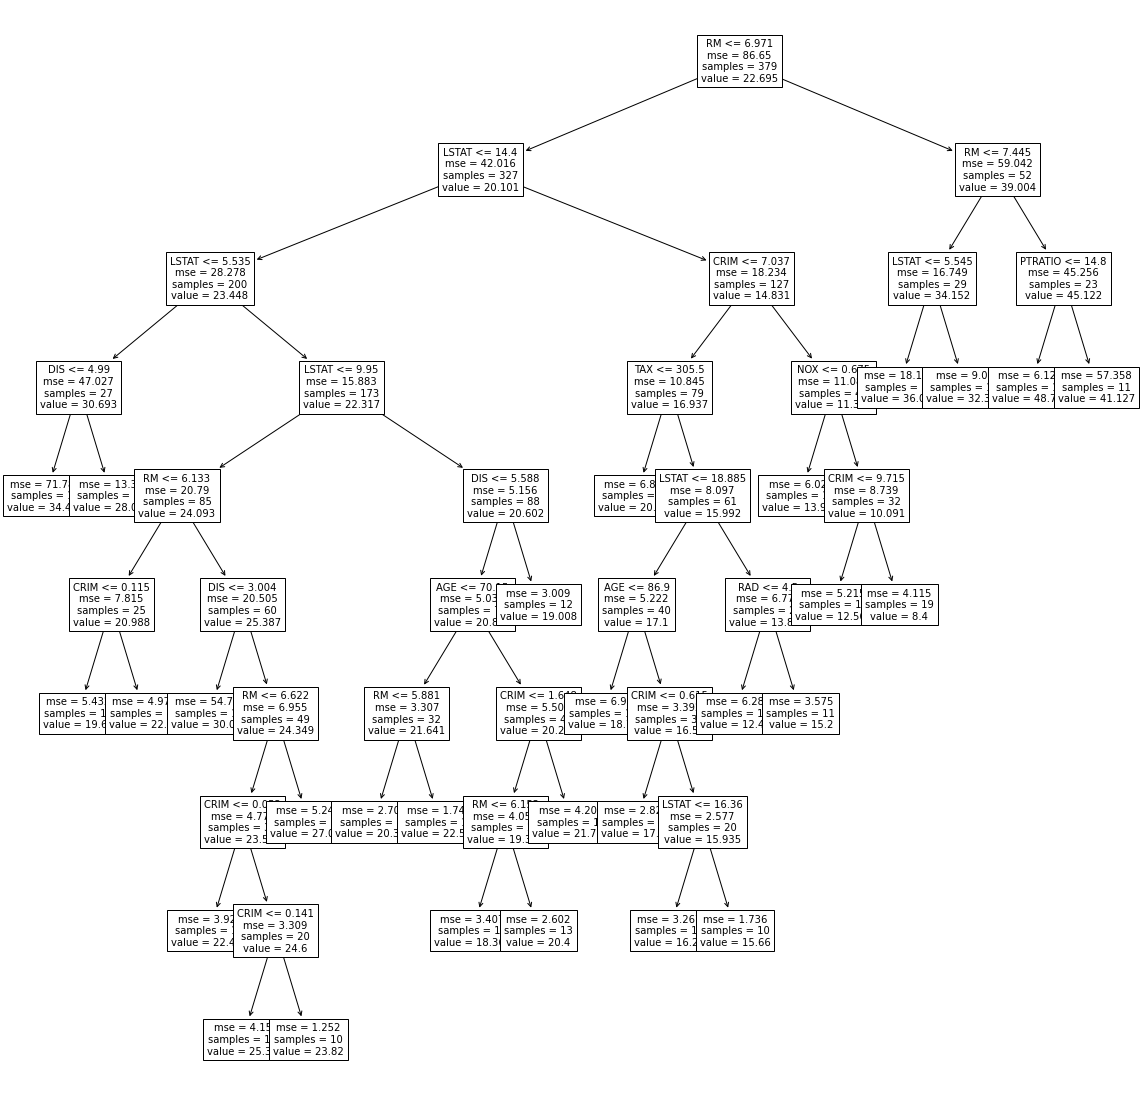

In [22]:
pyplot.figure(figsize=(20,20))
tr.plot_tree(tree_reg, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

### Regularization in DTs
In DTs, instead of incorporating penalties into the cost function, overfitting is controlled with a variety of hyperparameters such as maximum tree depth (`max_depth`) or number of samples needed for a split to be possible (`min_samples_split`).

You'll need to follow best practices for determining the values of these hyperparameters.

Let's check our last models performance on test set for varying (`max_depth`).

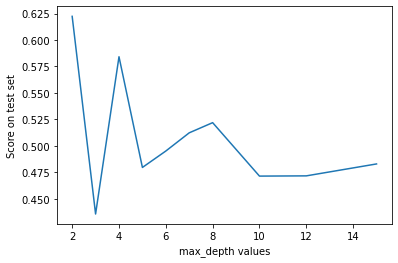

In [23]:
mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15]
errors = np.zeros(10)
index=0

for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=5)
    tree_reg.fit(housing_train_df.drop('target',axis=1),housing_train_df['target'])
    #u=mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])
    u=tree_reg.score(housing_test_df.drop('target',axis=1), housing_test_df['target'])
    errors[index]=u
    index+=1

x = np.array(range(0,10))
pyplot.plot(mdepths, errors)
pyplot.xlabel('max_depth values')
pyplot.ylabel('Score on test set')
pyplot.show()

## Another Regression Example with Regularization

This time let's use one feature and visualize the fitting model.

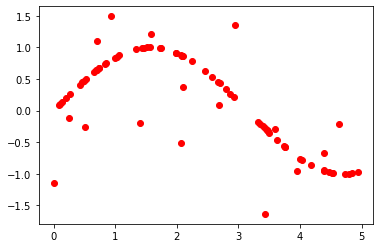

In [24]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)  #spreads 80 random points from [0,1] to [0,5] range.
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))  # this line adds noise

pyplot.plot(X,y, 'ro')
pyplot.show()

Lets fit a DT Regressor:

In [25]:
X_testvals = np.arange(0,5,0.01).reshape(-1,1)

tree=DecisionTreeRegressor(criterion='squared_error') #, max_depth=3) #squared_error is actually default value
dtr_yhat = tree.fit(X,y).predict(X_testvals)
#help(DecisionTreeRegressor())
pyplot.plot(X,y, 'ro')
pyplot.plot(X_testvals, dtr_yhat, 'g--')
pyplot.legend(['Training Data', 'Tree on Test'], loc='upper right')
pyplot.show()

KeyError: 'squared_error'

It looks like an 'overfit'. Also you can see the tree nodes below. Lets try to limit depth of the tree to 3.

In [ ]:
from sklearn import tree as tr
pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, fontsize=10)
pyplot.show()

# Homework #3 (due 2nd of July, 11:59 PM):

### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes).
- Use box plots to look at the data. 
- Create a training and test set (with shuffling).
- Train a decision tree classifier using the training set.
- What are the top 5 most important (discriminative) features?
- Train a logistic regression model using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.




##### Loading the breast cancer dataset

In [26]:
dataset = datasets.load_breast_cancer()
df = pd. DataFrame(data=np.c_[dataset['data'], dataset['target']],columns= list(dataset['feature_names']) + ['target'])

In [27]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [28]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

##### plotting different scatter plots with the target

<AxesSubplot:xlabel='worst perimeter', ylabel='worst concavity'>

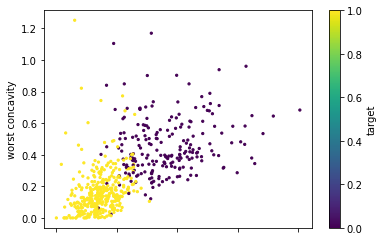

In [29]:
df.plot.scatter(x='worst perimeter',y='worst concavity',s=5,c='target',colormap='viridis')

<AxesSubplot:xlabel='mean radius', ylabel='mean area'>

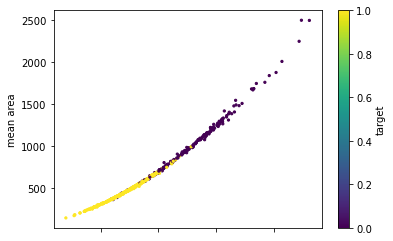

In [30]:
df.plot.scatter(x='mean radius',y='mean area',s=5,c='target',colormap='viridis')

<AxesSubplot:xlabel='mean symmetry', ylabel='worst symmetry'>

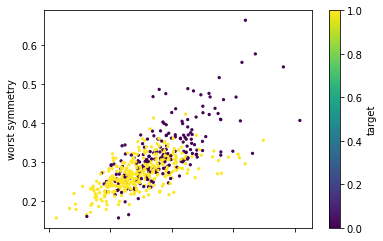

In [31]:
df.plot.scatter(x='mean symmetry',y='worst symmetry',s=5,c='target',colormap='viridis')

<AxesSubplot:xlabel='perimeter error', ylabel='area error'>

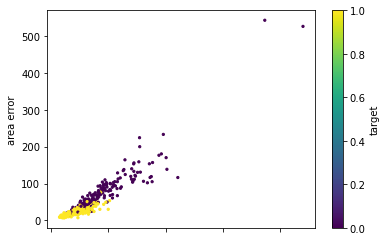

In [32]:
df.plot.scatter(x='perimeter error',y='area error',s=5,c='target',colormap='viridis')

#### plotting the box plots for mean radius,mean parameter and mean area for the target values

In [33]:
import seaborn as sns

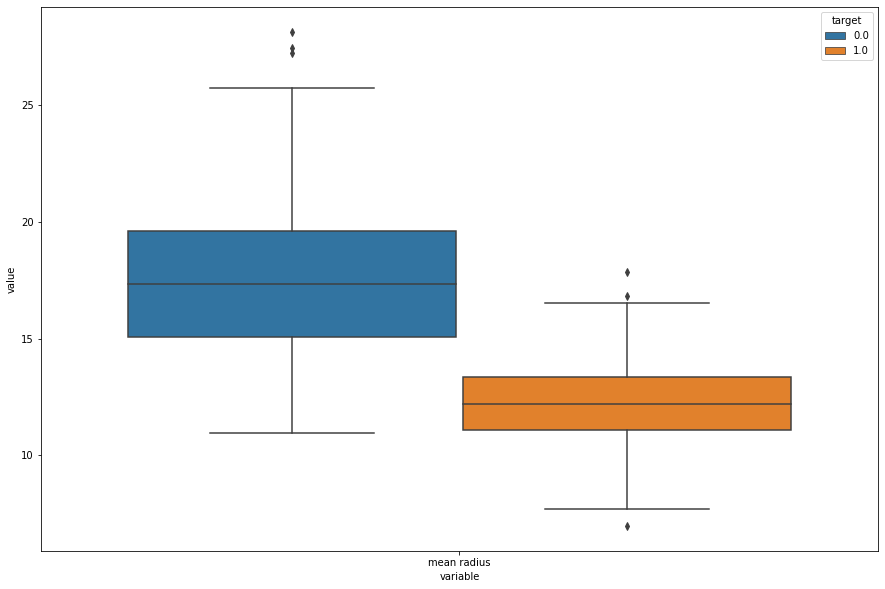

In [34]:
melted_data = pd.melt(df,id_vars = "target",value_vars = ['mean radius'])
pyplot.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="target",data= melted_data)
pyplot.show()

## ref: https://www.kaggle.com/code/luna248/breast-cancer-dataset/notebook

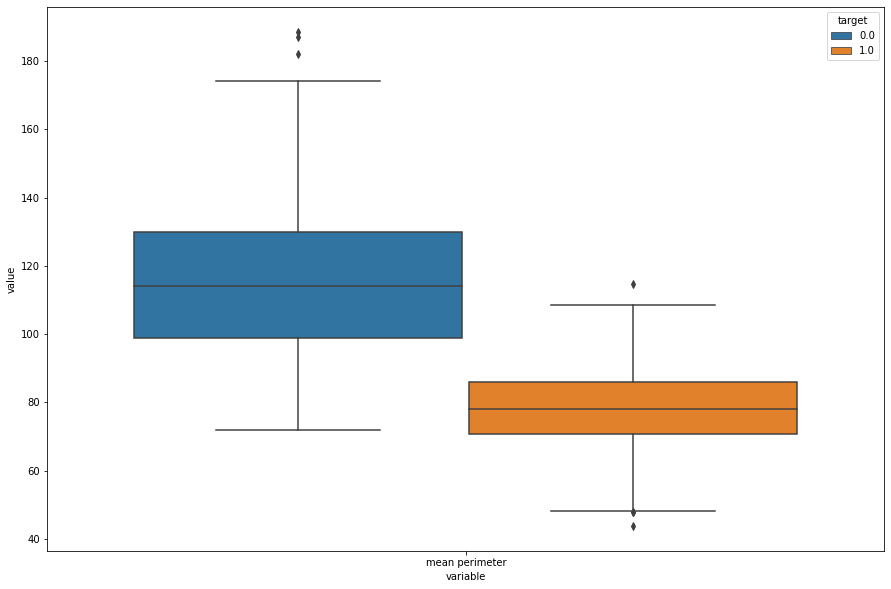

In [35]:
melted_data = pd.melt(df,id_vars = "target",value_vars = ['mean perimeter'])
pyplot.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="target",data= melted_data)
pyplot.show()

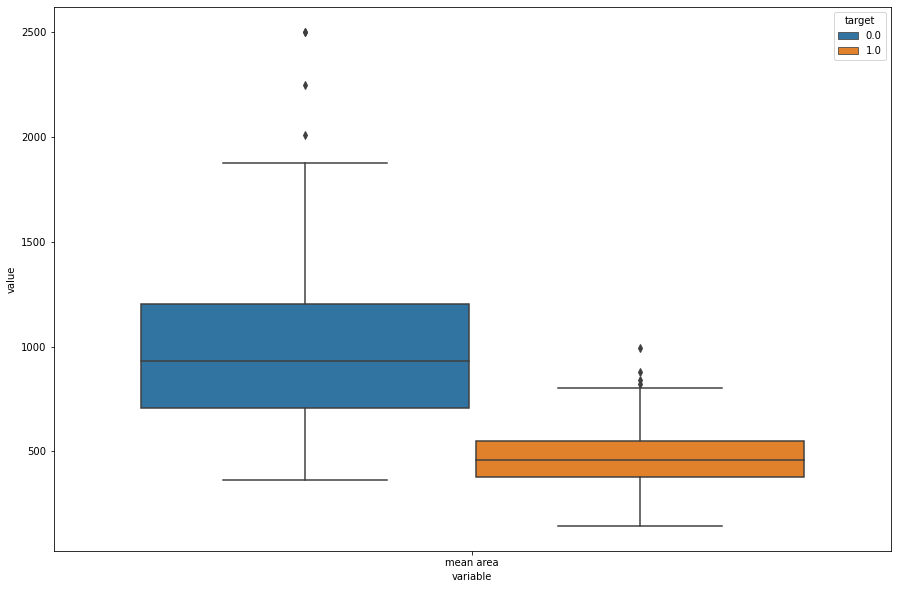

In [36]:
melted_data = pd.melt(df,id_vars = "target",value_vars = ['mean area'])
pyplot.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="target",data= melted_data)
pyplot.show()

#### creating training and testing datasets from the given dataset

In [37]:
train_df, test_df= train_test_split(df)  #default for shuffle is True


In [38]:
display(train_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
408,17.990,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503,0.0
275,11.890,17.36,76.20,435.6,0.12250,0.07210,0.059290,0.074040,0.2015,0.05875,...,18.99,79.46,472.4,0.13590,0.08368,0.07153,0.08946,0.2220,0.06033,1.0
311,14.610,15.69,92.68,664.9,0.07618,0.03515,0.014470,0.018770,0.1632,0.05255,...,21.75,103.70,840.8,0.10110,0.07087,0.04746,0.05813,0.2530,0.05695,1.0
397,12.800,17.46,83.05,508.3,0.08044,0.08895,0.073900,0.040830,0.1574,0.05750,...,21.06,90.72,591.0,0.09534,0.18120,0.19010,0.08296,0.1988,0.07053,1.0
381,11.040,14.93,70.67,372.7,0.07987,0.07079,0.035460,0.020740,0.2003,0.06246,...,20.83,79.73,447.1,0.10950,0.19820,0.15530,0.06754,0.3202,0.07287,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,19.530,18.90,129.50,1217.0,0.11500,0.16420,0.219700,0.106200,0.1792,0.06552,...,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929,0.0
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,26.29,68.81,366.1,0.13160,0.09473,0.02049,0.02381,0.1934,0.08988,1.0
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623,0.0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0.0


### ref: https://www.askpython.com/python/examples/split-data-training-and-testing-set


#### creating the decision tree classifier using the training dataset

In [39]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [40]:
# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [42]:
y_pred = classifer.predict(X_test)

In [43]:
# importing the accuracy score
from sklearn.metrics import accuracy_score

# accuracy
accuracy_score(y_pred,y_test)

0.958041958041958

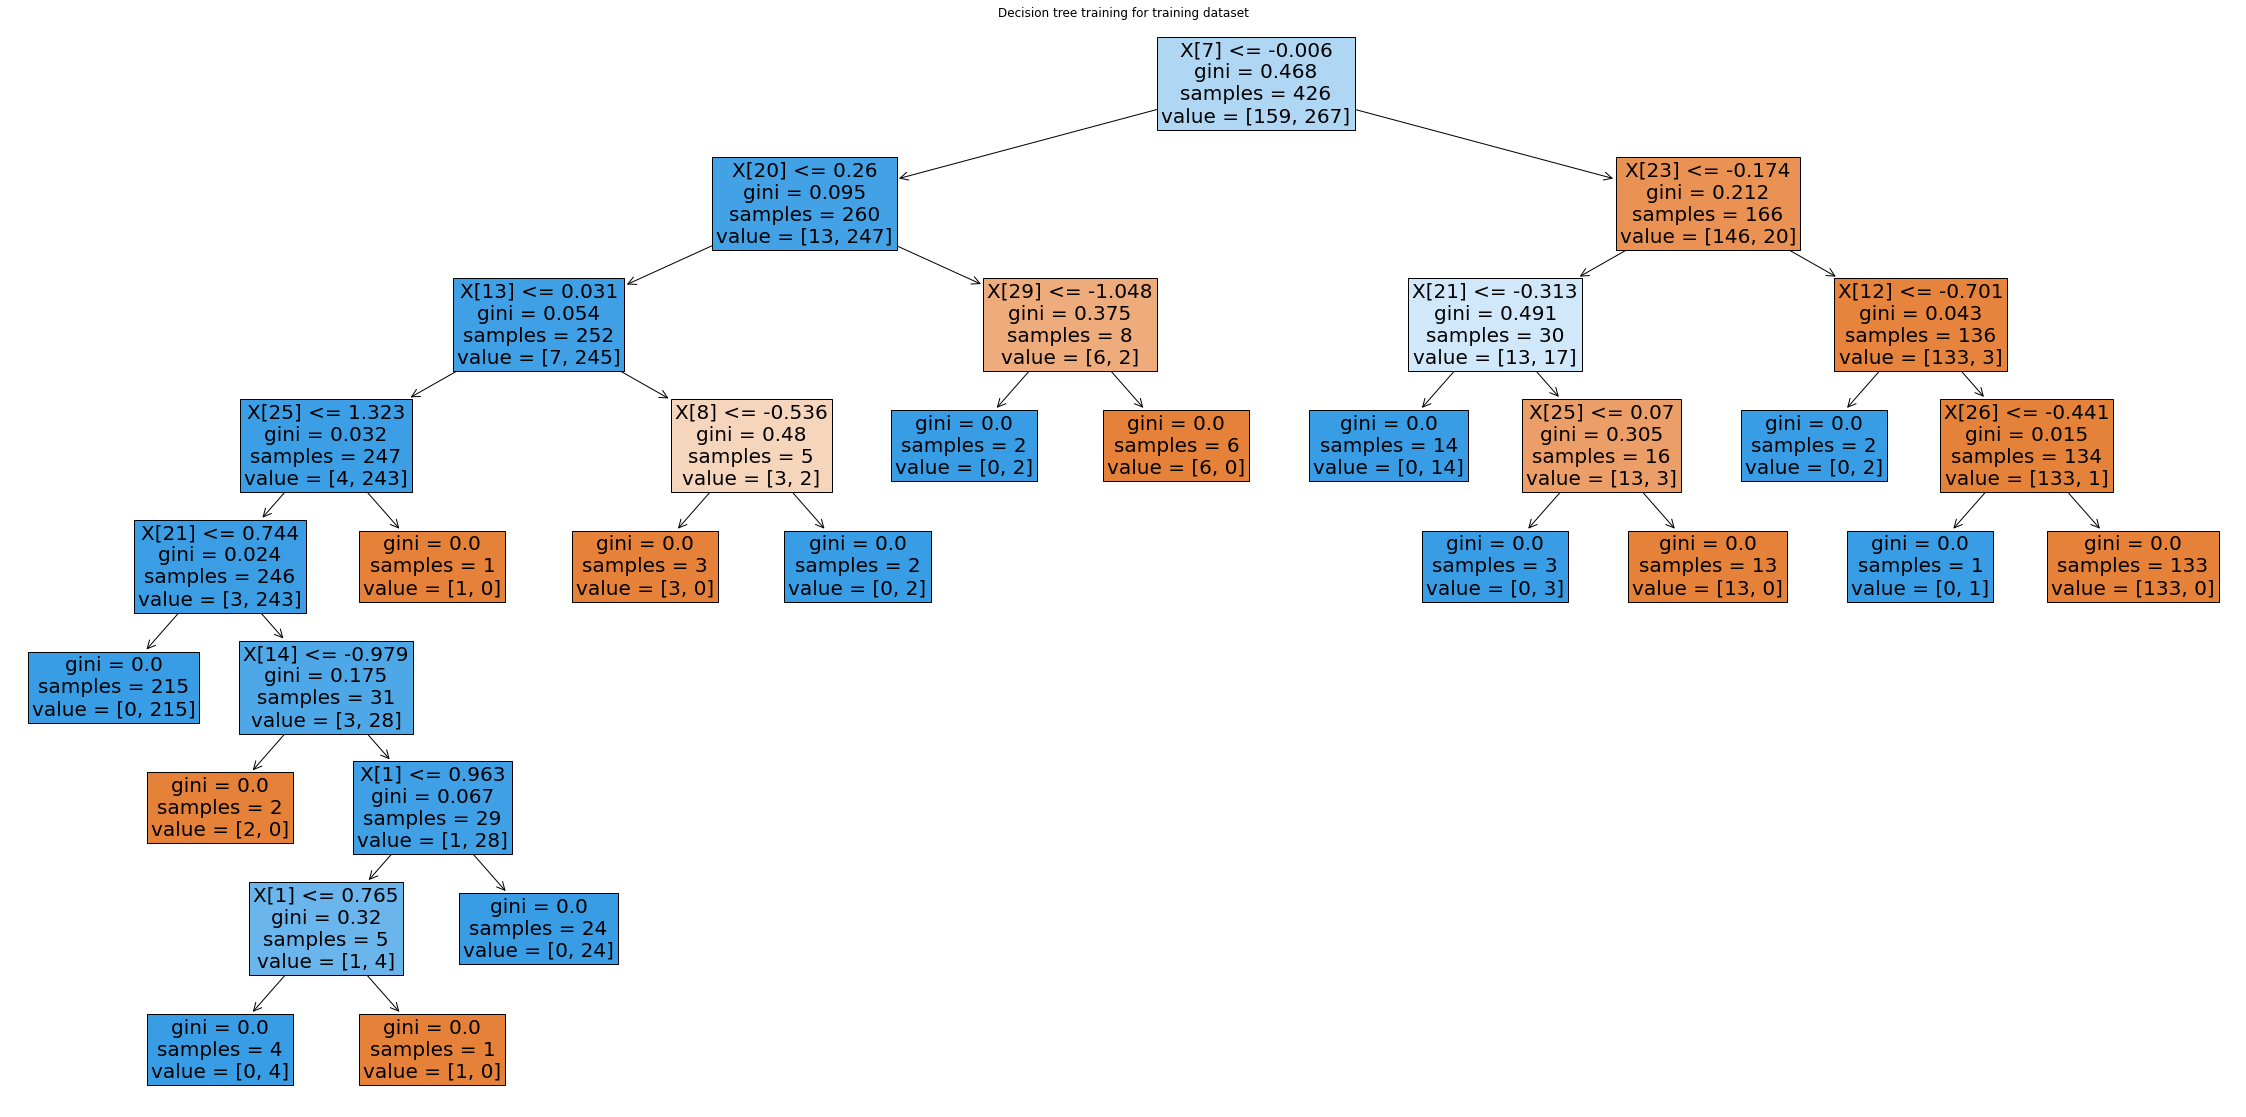

In [44]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
pyplot.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True,fontsize=20)
pyplot.title("Decision tree training for training dataset")
pyplot.show()




### https://www.datacamp.com/tutorial/decision-tree-classification-python
### https://hands-on.cloud/decision-tree-using-python/

#### the top 5 most discriminative features are
#### x[7]=mean concave points
#### x[23]=worst area
#### x[12]=perimeter error
#### x[21]=worst texture
#### x[13]=area error

#### creating the logistic regrssion model using the training dataset

In [45]:
train_df, test_df= train_test_split(df)

train_df = df.iloc[0:200]
test_df = df.iloc[200:275]

In [46]:
lr = LogisticRegression(C=1.0)
lr.fit(train_df.drop(['target'], axis=1),train_df['target'])

C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
lr.score(train_df.drop(['target'], axis=1),train_df['target'])

0.9389671361502347

In [48]:
lr.fit(test_df.drop(['target'], axis=1),test_df['target'])


C:\Users\pragathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
lr.score(test_df.drop(['target'], axis=1),test_df['target'])

0.9790209790209791

#### by comparing the testing scores of logistic regression and decision tree,it is observed that logistic score is 0.97 and decrision tree score is 0.95.hence logistic regression performed better on the testing dataset

### part 2

- Use the provided *winequality_white.csv* as your data. Last column (quality) is the target variable.
- Do not forget to shuffle and split (Train/test) your data.
- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [50]:
df1 = pd.read_csv('winequality_white.csv', delimiter = ';' )

In [51]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [52]:
df1['target']=df1['quality']

In [53]:
df2=df1.drop('quality',axis=1)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [54]:
train_df2, test_df2= train_test_split(df2)  #default for shuffle is True

In [55]:
train_df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
296,8.3,0.39,0.70,10.6,0.045,33.0,169.0,0.99760,3.09,0.57,9.4,5
3475,6.2,0.36,0.45,10.4,0.060,22.0,184.0,0.99711,3.31,0.56,9.8,6
1804,7.6,0.30,0.22,10.2,0.049,57.0,191.0,0.99660,3.08,0.40,9.3,6
181,7.1,0.34,0.15,1.2,0.053,61.0,183.0,0.99360,3.09,0.43,9.2,5
1033,7.1,0.30,0.36,6.8,0.055,44.5,234.0,0.99720,3.49,0.64,10.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3075,6.4,0.15,0.40,1.5,0.042,23.0,87.0,0.98972,3.11,0.46,12.2,7
4446,4.4,0.46,0.10,2.8,0.024,31.0,111.0,0.98816,3.48,0.34,13.1,6
3174,6.9,0.36,0.35,8.6,0.038,37.0,125.0,0.99160,3.00,0.32,12.4,8
1224,7.2,0.23,0.39,2.3,0.033,29.0,102.0,0.99080,3.26,0.54,12.3,7


In [56]:
test_df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4083,6.2,0.30,0.32,1.20,0.052,32.0,185.0,0.99266,3.28,0.44,10.1,5
1361,6.0,0.13,0.28,5.70,0.038,56.0,189.5,0.99480,3.59,0.43,10.6,7
1268,7.6,0.31,0.29,10.50,0.040,21.0,145.0,0.99660,3.04,0.35,9.4,5
704,5.6,0.25,0.26,3.60,0.037,18.0,115.0,0.99040,3.42,0.50,12.6,6
857,8.2,0.40,0.48,13.70,0.042,59.0,169.0,0.99860,3.10,0.52,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,6.8,0.27,0.35,7.80,0.048,76.0,197.0,0.99590,3.24,0.43,9.5,6
3025,5.4,0.22,0.29,1.20,0.045,69.0,152.0,0.99178,3.76,0.63,11.0,7
4744,5.0,0.24,0.19,5.00,0.043,17.0,101.0,0.99438,3.67,0.57,10.0,5
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6


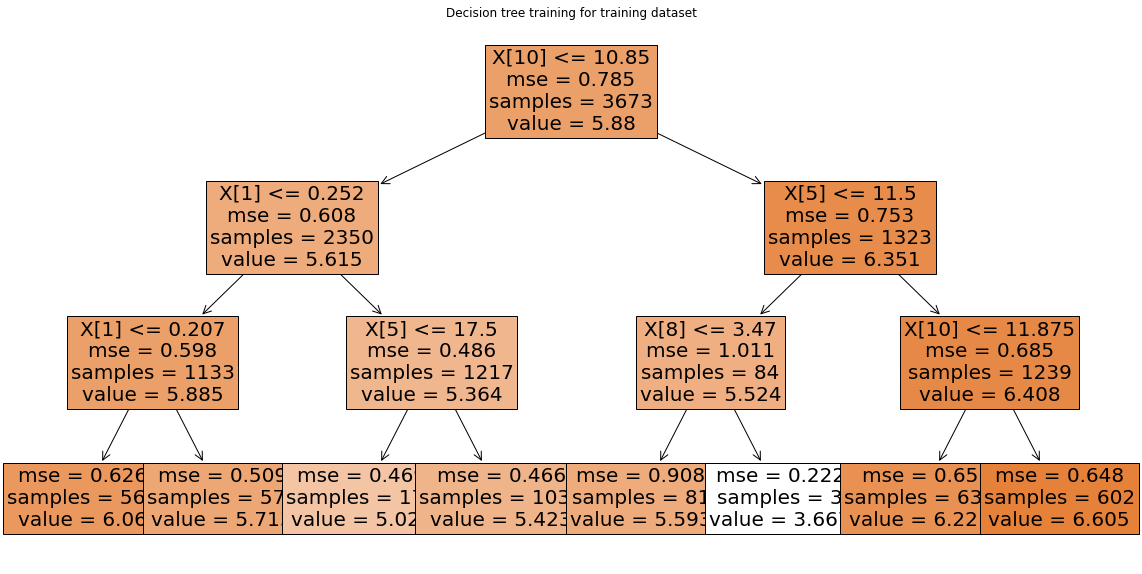

In [71]:
# output size of decision tree
pyplot.figure(figsize=(20,10))
tree_reg = DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)
# providing the training dataset
clf = tree_reg.fit(train_df2.drop('target', axis=1), train_df2['target'])
plot_tree(clf, filled=True,fontsize=20)
pyplot.title("Decision tree training for training dataset")
pyplot.show()

In [57]:
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)
tree_reg.fit(df2.drop('target',axis=1),df2['target'])
tree_reg.score(df2.drop('target',axis=1), df2['target'])

0.5776317346184382

In [58]:
tree_reg = DecisionTreeRegressor(max_depth=20, min_samples_leaf=20)
tree_reg.fit(df2.drop('target',axis=1),df2['target'])
tree_reg.score(df2.drop('target',axis=1), df2['target'])

0.528687796168319

In [59]:
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
tree_reg.fit(df2.drop('target',axis=1),df2['target'])
tree_reg.score(df2.drop('target',axis=1), df2['target'])

0.626879329667723

In [60]:
tree_reg = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10)
tree_reg.fit(df2.drop('target',axis=1),df2['target'])
tree_reg.score(df2.drop('target',axis=1), df2['target'])

0.6497269825160104

In [61]:
tree_reg = DecisionTreeRegressor(max_depth=50, min_samples_leaf=5)
tree_reg.fit(df2.drop('target',axis=1),df2['target'])
tree_reg.score(df2.drop('target',axis=1), df2['target'])

0.7844050464150412

In [62]:
tree_reg = DecisionTreeRegressor(max_depth=100, min_samples_leaf=2)
tree_reg.fit(df2.drop('target',axis=1),df2['target'])
tree_reg.score(df2.drop('target',axis=1), df2['target'])

0.9337627329255055

by considering different values of max depth and minum samples it is observed that for max depth=100 and minimum samples=2 decission tree regression score is best.

In [63]:
mean_squared_error(tree_reg.predict(df2.drop('target',axis=1)), df2['target'])

0.05194296991969512

##### the mean squared error for the best sample is 0.0529